<a href="https://colab.research.google.com/github/Riyaz402p/Classifcation_Infosys_Internship_Oct2024/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image downloaded as 'flower_vase.jpg'


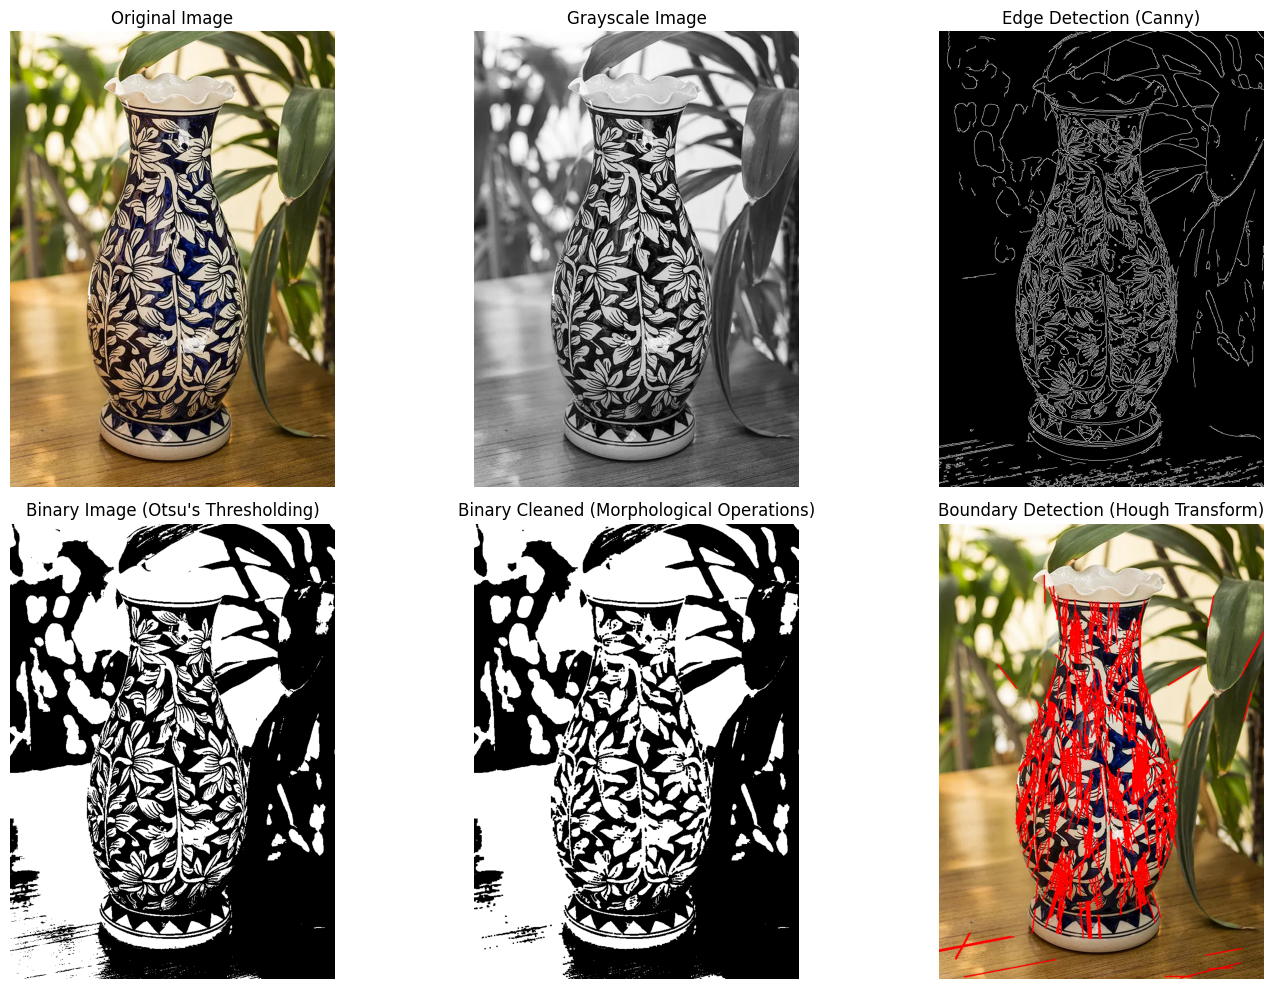

In [1]:
import requests
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from io import BytesIO

# Step 1: Image Acquisition (Download image from URL)
image_url = 'https://imgshopnewgumlet.lbb.in/catalog/product/x/-/x-02-bx-j-020-e-1.jpg?fm=webp&w=750&h=500&dpr=2'

# Download the image and save it locally
response = requests.get(image_url)
with open('flower_vase.jpg', 'wb') as file:
    file.write(response.content)
print("Image downloaded as 'flower_vase.jpg'")

# Load the image from the saved file
image = cv2.imread('flower_vase.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Edge Detection (Canny Edge Detection)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 100, 200)

# Step 3: Binary Conversion (Otsu's Thresholding)
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Binary Image Preprocessing (Noise Removal using Morphological Operations)
kernel = np.ones((3, 3), np.uint8)
binary_cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Step 5: Boundary Detection (Hough Line Transform)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)
boundary_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(boundary_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Step 6: Output Generation (Display Images)
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Edge Detection (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Binary Image (Otsu's Thresholding)")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Binary Cleaned (Morphological Operations)")
plt.imshow(binary_cleaned, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Boundary Detection (Hough Transform)")
plt.imshow(boundary_image)
plt.axis('off')

plt.tight_layout()
plt.show()
